In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/merged_data.csv")

In [3]:
df.head()

,Iteration,A,R,sdvig,polojenie
0,1,2.5,10.0,20,-50.0
1,2,2.5,10.0,20,-47.5
2,3,2.5,10.0,20,-45.0
3,4,2.5,10.0,20,-42.5
4,5,2.5,10.0,20,-40.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122883 entries, 0 to 122882
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Iteration  122883 non-null  int64  
 1   A          122883 non-null  float64
 2   R          122883 non-null  float64
 3   sdvig      122883 non-null  int64  
 4   polojenie  122883 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 4.7 MB


In [5]:
df.describe()

,Iteration,A,R,sdvig,polojenie
count,122883.000000,122883.000000,122883.000000,122883.000000,122883.000000
mean,61442.000000,4.360009,12.918776,74.383763,-0.037088
std,35473.410902,2.192117,2.914368,34.567032,29.577603
min,1.000000,1.000000,7.500000,20.000000,-50.000000
25%,30721.500000,2.500000,10.500000,40.000000,-25.000000
50%,61442.000000,4.500000,13.000000,70.000000,0.000000
75%,92162.500000,6.000000,15.000000,100.000000,25.000000
max,122883.000000,8.000000,20.000000,130.000000,50.000000


In [6]:
df.duplicated().sum()

np.int64(0)

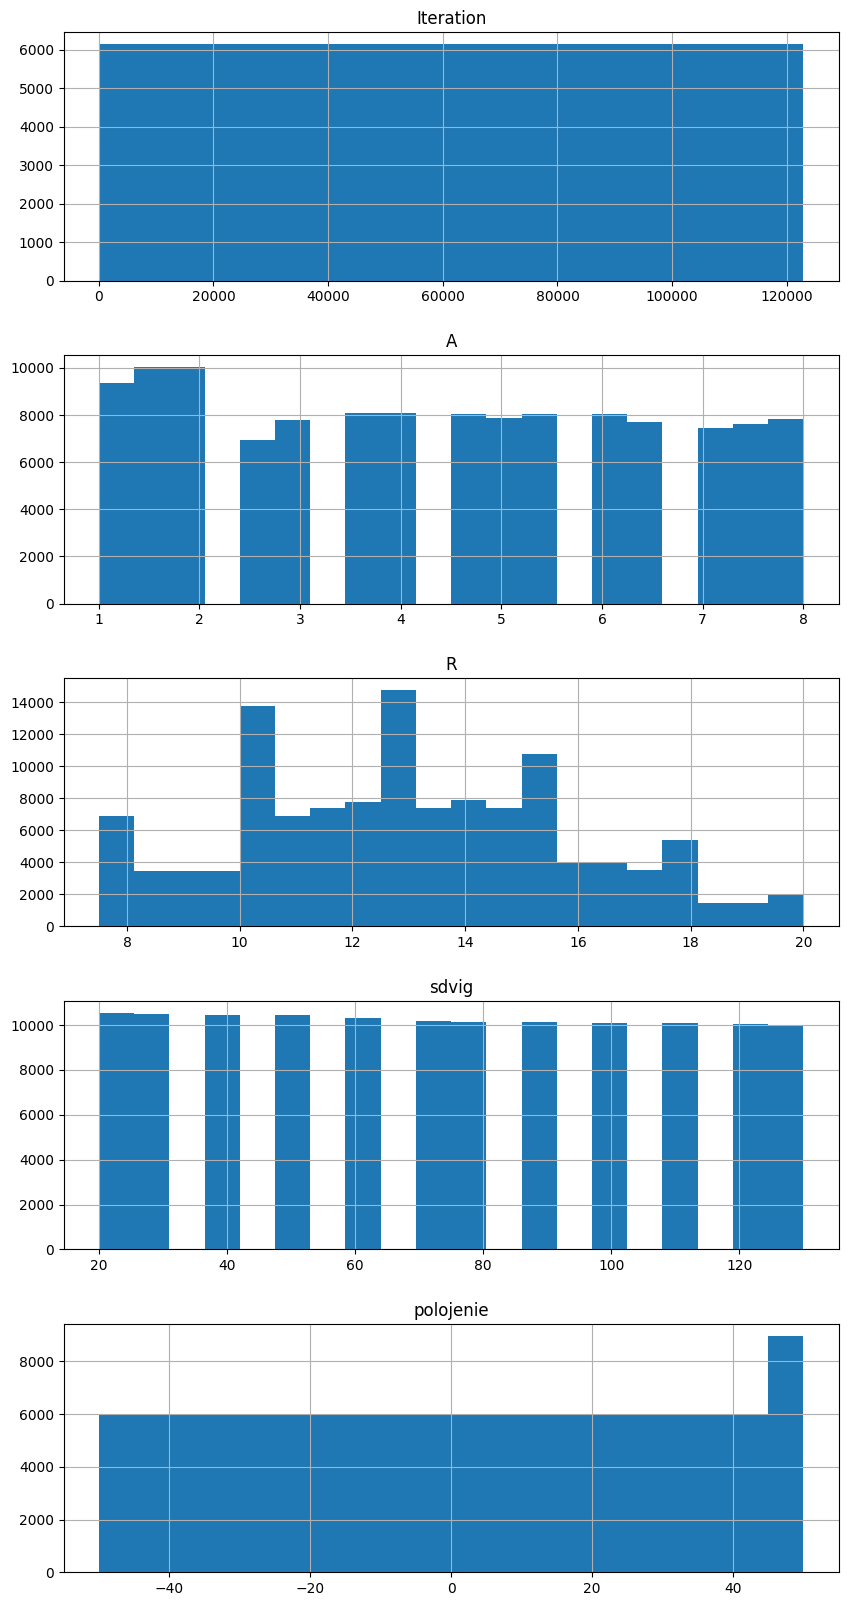

In [7]:
df.hist(figsize=(10,20), layout=(-1, 1),bins=20)
plt.show()

In [9]:
# Сортировка по колонкам A, R, sdvig, polojenie
df_sorted = df.sort_values(by=['A', 'R', 'sdvig', 'polojenie'], ascending=True).reset_index(drop=True)

# Создание колонки filename на основе Iteration
df_sorted['filename'] = df_sorted['Iteration'].apply(lambda x: f"interf_{x}.png")

# Переместим колонку filename в начало
cols = ['filename'] + [col for col in df_sorted.columns if col != 'filename']
df_sorted = df_sorted[cols]

# Добавим fold индекс
df_sorted['fold'] = df_sorted.index % 10

# Разбиение на выборки
train_df = df_sorted[df_sorted['fold'].isin([1,2,3,4,5,6,7,8])].drop(columns=['fold'])
val_df   = df_sorted[df_sorted['fold'] == 9].drop(columns=['fold'])
test_df  = df_sorted[df_sorted['fold'] == 0].drop(columns=['fold'])

# Сортировка внутри выборок по Iteration и удаление Iteration
train_df = train_df.sort_values(by='Iteration').drop(columns=['Iteration'])
val_df   = val_df.sort_values(by='Iteration').drop(columns=['Iteration'])
test_df  = test_df.sort_values(by='Iteration').drop(columns=['Iteration'])

# Сохранение
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

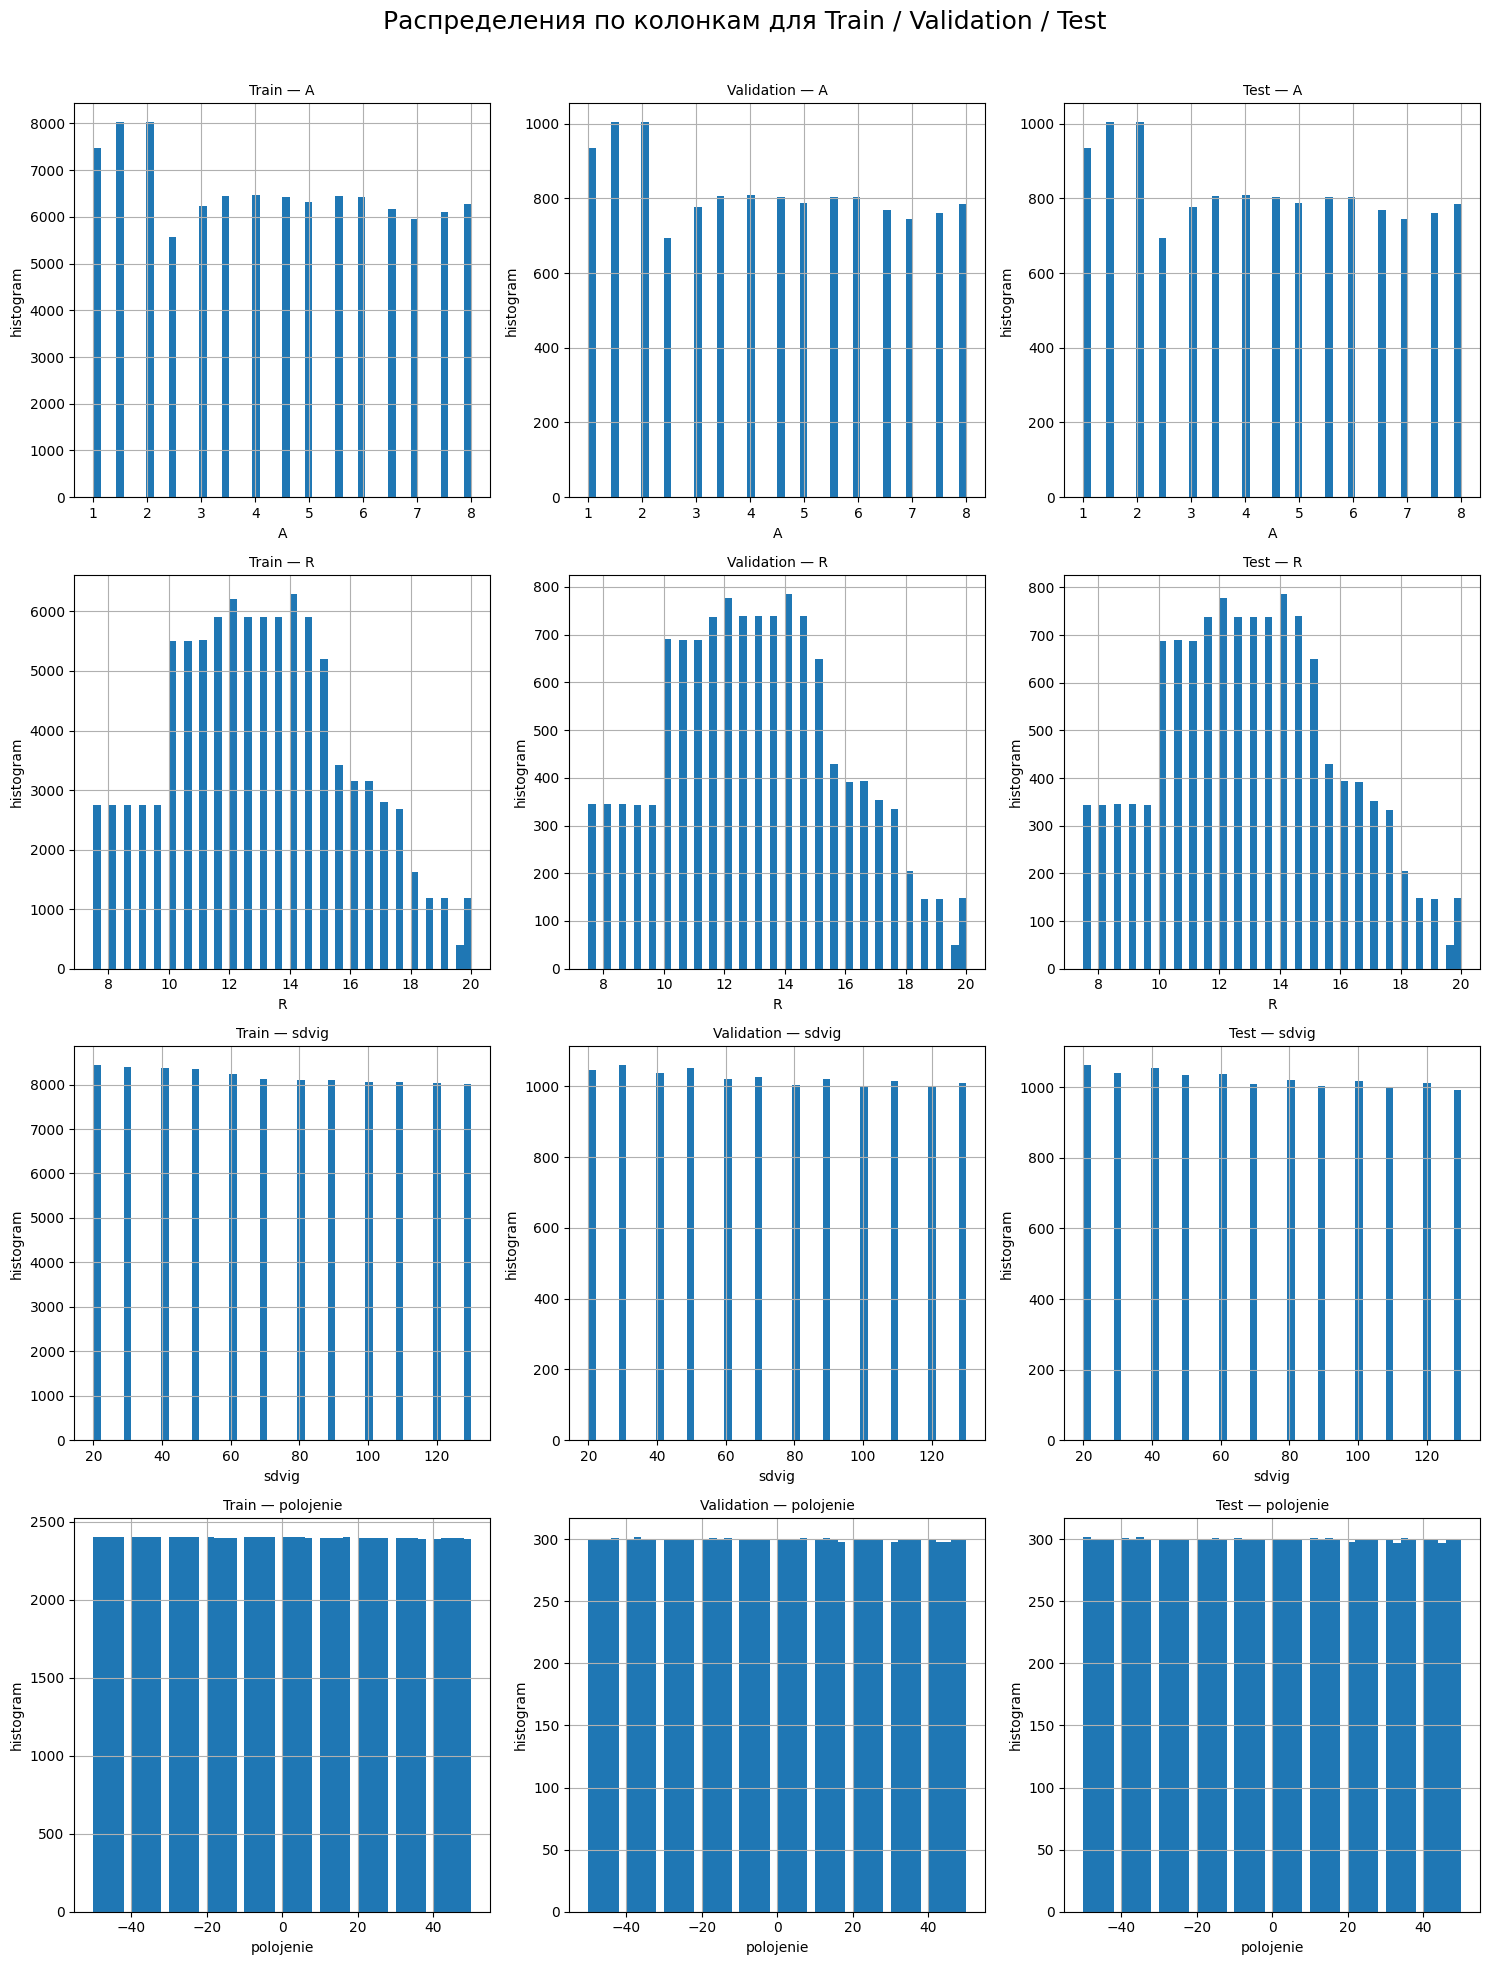

In [ ]:
# Построение гистограмм
columns = ['A', 'R', 'sdvig', 'polojenie']
dfs = {'Train': train_df, 'Validation': val_df, 'Test': test_df}

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
fig.suptitle('Распределения по колонкам для Train / Validation / Test', fontsize=18)

for row_idx, col in enumerate(columns):
    for col_idx, (name, df_part) in enumerate(dfs.items()):
        ax = axes[row_idx, col_idx]
        df_part[col].hist(ax=ax, bins=50)
        ax.set_title(f'{name} — {col}', fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel('histogram')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('fold_histograms.png')  # сохраняем график
plt.show()

In [11]:
train_df.describe()

,A,R,sdvig,polojenie
count,98306.000000,98306.000000,98306.000000,98306.000000
mean,4.359993,12.918759,74.383863,-0.036035
std,2.192105,2.914274,34.567250,29.577414
min,1.000000,7.500000,20.000000,-50.000000
25%,2.500000,10.500000,40.000000,-25.000000
50%,4.500000,13.000000,70.000000,0.000000
75%,6.000000,15.000000,100.000000,25.000000
max,8.000000,20.000000,130.000000,50.000000


In [12]:
val_df.describe()

,A,R,sdvig,polojenie
count,12288.000000,12288.000000,12288.000000,12288.000000
mean,4.360189,12.918538,74.420573,-0.036214
std,2.192212,2.915064,34.567724,29.578038
min,1.000000,7.500000,20.000000,-50.000000
25%,2.500000,10.500000,40.000000,-25.000000
50%,4.500000,13.000000,70.000000,0.000000
75%,6.000000,15.000000,100.000000,25.000000
max,8.000000,20.000000,130.000000,50.000000


In [13]:
test_df.describe()

,A,R,sdvig,polojenie
count,12289.000000,12289.000000,12289.000000,12289.000000
mean,4.359956,12.919155,74.346163,-0.046383
std,2.192303,2.914658,34.567373,29.581085
min,1.000000,7.500000,20.000000,-50.000000
25%,2.500000,10.500000,40.000000,-25.000000
50%,4.500000,13.000000,70.000000,0.000000
75%,6.000000,15.000000,100.000000,25.000000
max,8.000000,20.000000,130.000000,50.000000
